**Table of contents**<a id='toc0_'></a>    
- [PROJECT ICE VIDEO GAMES STORE](#toc1_)    
- [Introduccion](#toc2_)    
- [Carga de los datos](#toc3_)    
- [Descripcion de los datos](#toc4_)    
- [Preparacion de datos](#toc5_)    
- [Procesamiento preliminar de datos nulos:](#toc6_)    
  - [Análisis Preliminar del Dataset `games.csv`](#toc6_1_)    
  - [Análisis de Datos](#toc6_2_)    
      - [¿Cuántos juegos fueron lanzados en diferentes años?. ¿Son significativos los datos de cada período?](#toc6_2_1_1_)    
  - [Análisis Segun Plataforma](#toc6_3_)    
    - [Conclusiones](#toc6_3_1_)    
- [¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?](#toc7_)    
    - [Lideres en ventas :](#toc7_1_1_)    
    - [Conclusión:](#toc7_1_2_)    
- [Reseñas De Usuarios Vs Profesionales](#toc8_)    
  - [¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?](#toc8_1_)    
  - [Conclusión general:](#toc8_2_)    
- [Distribución General De Los Juegos Por Género](#toc9_)    
  - [Conclusiones](#toc9_1_)    
- [Perfil De Usuario Segun Cada Región (NA, UE, JP)](#toc10_)    
  - [Perfil para ventas en Norteamérica](#toc10_1_)    
      - [Analisis:](#toc10_1_1_1_)    
      - [Analisis](#toc10_1_1_2_)    
      - [Analisis](#toc10_1_1_3_)    
    - [Estructura y Conclusiones de Perfil Americano](#toc10_1_2_)    
  - [Perfil para ventas en la Union Europea](#toc10_2_)    
      - [Analisis](#toc10_2_1_1_)    
      - [Analisis](#toc10_2_1_2_)    
      - [Analisis](#toc10_2_1_3_)    
    - [Estructura y Conclusonas del perfil Europeo](#toc10_2_2_)    
  - [Perfil para ventas en Japon](#toc10_3_)    
      - [Analisis](#toc10_3_1_1_)    
      - [Analisis](#toc10_3_1_2_)    
      - [Analisis](#toc10_3_1_3_)    
    - [Estructura y Conclusionas del perfil Japones](#toc10_3_2_)    
- [Prueba de Hipotesis](#toc11_)    
  - [Conclusiones Generales](#toc11_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[PROJECT ICE VIDEO GAMES STORE](#toc0_)

# <a id='toc2_'></a>[Introduccion](#toc0_)
ICE es una tienda en línea especializada en la venta de videojuegos a nivel global. Además de ofrecer una amplia variedad de títulos, la plataforma se encarga de gestionar reseñas de usuarios y expertos, clasificar los juegos por géneros y plataformas (como Xbox o PlayStation), y recopilar datos históricos sobre ventas. Este proyecto tiene como objetivo analizar esta información para identificar patrones y factores clave que determinen el éxito o fracaso de un videojuego.

Mediante este análisis, se buscará desarrollar un modelo que permita predecir qué juegos tienen mayor potencial de éxito en el mercado. Esto no solo facilitará la detección de proyectos prometedores, sino que también servirá como base para planificar campañas publicitarias más efectivas y estratégicas, optimizando así los recursos y maximizando el impacto en el mercado global de videojuegos.

# <a id='toc3_'></a>[Carga de los datos](#toc0_)

Para nuestro analisis contamos con un dataset relacionado, proporcionado por la compañia denominado `games.csv` en donde contraremos la informacion y a su vez se procedera con el desglose y analisis del mismo.

Para esta primera parte del proyecto al leer los archivos CSV se debe tener en cuenta los sepadarores, en este caso en particular tenemos como separador `,` de tal razon que se procedera a corregir este parametro y poder importar los datos y su informacion de manera correcta.

In [83]:
# Cargar todas las librerías
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
# leer conjuntos de datos:
games=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto spring 6/games.csv', sep=',')


# <a id='toc4_'></a>[Descripcion de los datos](#toc0_)

El data set proporcionado por la compañia lo podemos desglosar por columnaas de la siguiente manera:

`— Name (Nombre del Video Juego)`

`— Platform (Plataforma)`

`— Year_of_Release (Año de lanzamiento)`

`— Genre (Género) `

`— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)` 

`— EU_sales (ventas en Europa en millones de dólares estadounidenses) `

`— JP_sales (ventas en Japón en millones de dólares estadounidenses) `

`— Other_sales (ventas en otros países en millones de dólares estadounidenses) `

`— Critic_Score (máximo de 100)` 

`— User_Score (máximo de 10)` 

`— Rating (ESRB)`

In [85]:
# Mostramos informacion preliminar del Dataframe:

games.info()

sample_games= games.sample(n=5)

print(sample_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                                Name Platform  \
4422   SpongeBob SquarePants: Lights, Camera, Pants!       GC   
15898                             Hands On! Tangrams       DS   
15156                        DemiKids: Light V

# <a id='toc5_'></a>[Preparacion de datos](#toc0_)

De manera inicial, se ha observado que en cada columna del conjunto de datos existe una cantidad significativa de valores nulos o vacíos, lo cual podría afectar la calidad y confiabilidad del análisis. Además, se identificaron inconsistencias en los tipos de datos, donde algunos valores no coinciden con la naturaleza esperada de las columnas correspondientes.

Como primer paso, se procederá a abordar el problema de los datos nulos, implementando estrategias como la imputación o eliminación, según sea más adecuado para cada caso. Posteriormente, se trabajará en la normalización y corrección de los tipos de datos, asegurando que cada columna contenga información coherente y estructurada para facilitar el análisis posterior. Estas acciones son fundamentales para garantizar la integridad y utilidad de los datos en las siguientes fases del proyecto.



In [86]:
# Ajustamos los nombres de las columnas para mantener minuculas:

games.columns=[columns.lower()for columns in games.columns]

# Ajustamos nombres de todo el dataframe en minusculas:
games=games.apply(lambda x:x.str.lower() if x.dtype=='object' else x)
print(games.columns) 

# Comprobacion de duplicados:
num_duplicates=games.duplicated().sum()

print()
print(f"Numero de duplicados: {num_duplicates}")



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Numero de duplicados: 0


In [87]:
# Analisis exploratorio de datos NA:

games_na_nu=games.isna().sum()

print(games_na_nu)

games_year=games['year_of_release'].unique()

print(games_year)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


Al explorar los datos nos damos cuenta que algunos tipos de daltos no corresponden al valor que deben represetnar especificamente el de las columnas `year_of_release` y `user_score` de tal manera se procede a su tratamiento obenienndo de misma manera una organizacion de los mismos.

In [88]:
#Ajustar tipo de datos:

games['year_of_release']=pd.to_numeric(games['year_of_release'], errors='coerce')

games['year_of_release']=games['year_of_release'].astype('Int64')

games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

games['user_score']=games['user_score'].astype('float')
games.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


# <a id='toc6_'></a>[Procesamiento preliminar de datos nulos:](#toc0_)

Para esta parte de nuestra preparacion de datos decidimos reemplazar en la columna `year_of_release` partiendo de la premisa de que solo para el año 2016 habria datos faltantes decidimos completarlos con este mismo, para la columna `rating` por las siglas 'TBD' que significa "to be determined" (a determinar) y para los demas valores de manera preliminar se mantendra en blanco con fin de adelantar investigacion posterior

In [89]:
# Reemplazamos Datos:
games['year_of_release']=games['year_of_release'].fillna(value=2016)

games['rating']=games['rating'].fillna(value='tbd')


games['critic_score']=games['critic_score'].fillna('')
games['user_score']=games['user_score'].fillna('')

games_na_nu=games.isna().sum()
print(games_na_nu)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Al cabo de realizar el procesamiento de datos nulos, se puede evidenciar que existen dos nombres de video juegos ausentes, por consiguiente se hace notorio el hecho de que la mejor manera para tratarlo es eliminar del dataframe, por la natureleza de los datos se hace imposible trabajar con esas columnas. 

In [90]:
#Eliminacion de filas con NAN:

games=games.dropna()
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(4), object(6)
memory usage: 1.5+ MB


## <a id='toc6_1_'></a>[Análisis Preliminar del Dataset `games.csv`](#toc0_)

Tras completar el procesamiento inicial de los datos contenidos en el archivo `games.csv`, se ha preparado el conjunto de datos para su análisis exhaustivo. Este proceso incluyó la limpieza, transformación y organización de la información, con el objetivo de garantizar su calidad y consistencia.

Con los datos estructurados y listos para su uso, se procederá a realizar un análisis detallado que permita identificar patrones, tendencias y relaciones clave. Este análisis será fundamental para proponer las mejores alternativas y soluciones a la problemática planteada por la empresa, contribuyendo así a la toma de decisiones informadas y estratégicas

## <a id='toc6_2_'></a>[Análisis de Datos](#toc0_)

A lo largo de este analisis se ira respondiendo una seria de preguntas y existira explicaciones para cada puntos que se desarrollara en cada uno de las siguientes fases.

#### <a id='toc6_2_1_1_'></a>[¿Cuántos juegos fueron lanzados en diferentes años?. ¿Son significativos los datos de cada período?](#toc0_)

    year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   771


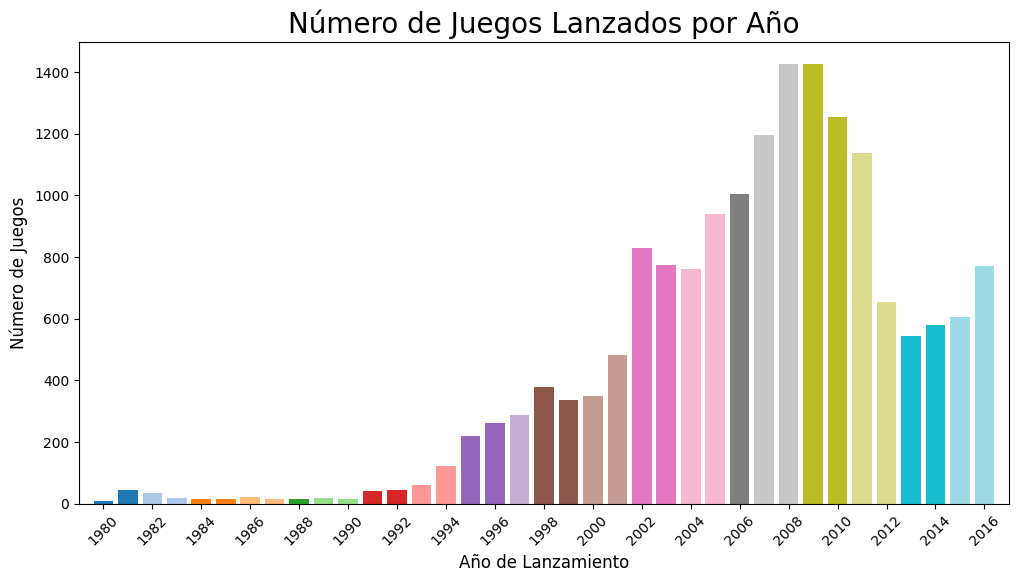

In [91]:

games_for_year=games.groupby('year_of_release')['name'].count().reset_index()
print(games_for_year)

colors = plt.get_cmap('tab20', len(games_for_year['year_of_release']))
plt.figure(figsize=(12,6))
plt.bar(games_for_year['year_of_release'],games_for_year['name'], color=colors(range(len(games_for_year['year_of_release']))))
plt.title('Número de Juegos Lanzados por Año', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.xlim(1979,2017)
plt.xticks(np.arange(1980, 2017, 2),rotation=45)  

plt.show()

¿Son significativos los datos de cada período?

El análisis de los datos sobre el número de lanzamientos por año permite identificar patrones con cierta relevancia.

Década de 1980: El número de juegos lanzados anualmente era muy bajo, con un pico máximo que no superaba los 50 títulos. Esto puede atribuirse a las limitaciones tecnológicas de la época, así como a una menor competencia y demanda en la industria.
Década de 1990: Se observa un aumento considerable en la cantidad de lanzamientos, impulsado por avances tecnológicos y el crecimiento del mercado de los videojuegos.
Inicio del siglo XXI: La industria experimenta un crecimiento exponencial en la cantidad de lanzamientos, lo que sugiere un auge en la popularidad y adopción de los videojuegos como parte de la cultura global.
A partir de 2010: Se identifica una recesión en la cantidad de lanzamientos, seguida de un ligero repunte en los años más recientes. Esto podría indicar una fase de transformación en la industria, posiblemente influenciada por cambios en el modelo de negocio, nuevas plataformas de distribución y evolución en las preferencias de los consumidores.

## <a id='toc6_3_'></a>[Análisis Segun Plataforma](#toc0_)

Observaremos cómo varían las ventas de una plataforma a otra. Se elegiran las plataformas con las mayores ventas totales y construira una distribución basada en los datos de cada año. 

In [92]:
# Plataformas de analisis:

games_platform=games['platform'].unique()

print(games_platform)


['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


In [93]:
# Calcular las ventas totales de cada plataforma:

games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 1.7+ MB


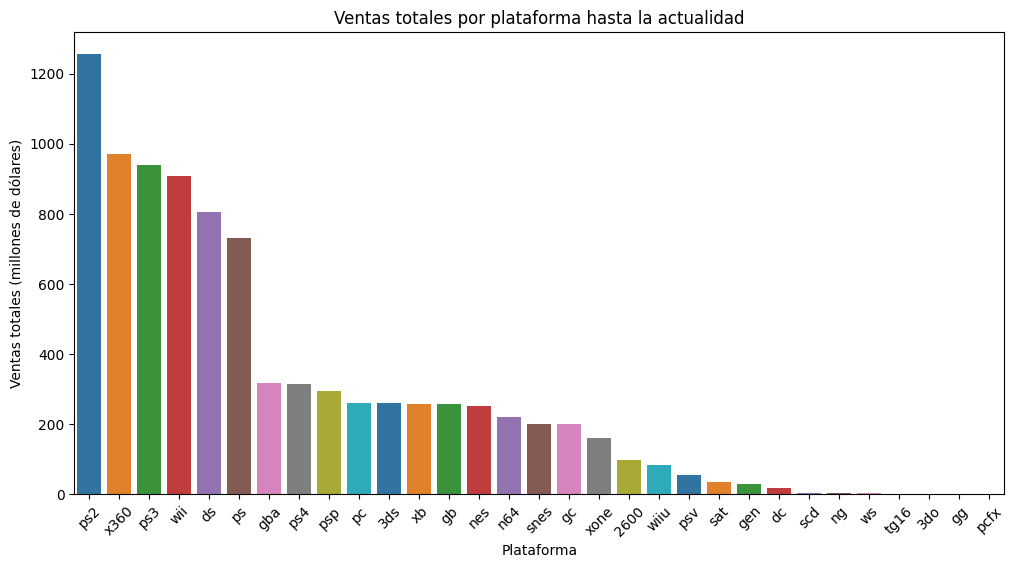

In [94]:
# Ventas totales por plataforma en millones de dolares:

# Agrupar por plataforma y sumar las ventas
games_platform_sale = games.groupby('platform')['total_sales'].sum().reset_index()

# Ordenar por ventas totales
games_platform_sales = games_platform_sale.sort_values(by='total_sales', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales',hue='platform', data=games_platform_sales, palette='tab10')

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones de dólares)')
plt.title('Ventas totales por plataforma hasta la actualidad')
plt.xticks(rotation=45) 
plt.show()


In [95]:
# Filtrar por el mayor numero de ventas la plataformas que se consideran relevantes:

platform_filter=['ps2','ps3','wii','x360','pc'] #'xb','gba','gc','3ds','psv','ps4','n64','xone','snes','sat','wiiu'

games_filtered=games[games['platform'].isin(platform_filter)]

games_platform_year=games_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

print(games_platform_year)


   platform  year_of_release  total_sales
0        pc             1985         0.04
1        pc             1988         0.03
2        pc             1992         3.03
3        pc             1994        12.87
4        pc             1995         4.22
5        pc             1996        10.58
6        pc             1997        11.27
7        pc             1998         3.26
8        pc             1999         4.74
9        pc             2000         4.66
10       pc             2001         5.47
11       pc             2002         8.57
12       pc             2003         8.84
13       pc             2004        10.39
14       pc             2005         4.37
15       pc             2006         2.85
16       pc             2007         9.28
17       pc             2008        12.42
18       pc             2009        16.91
19       pc             2010        24.28
20       pc             2011        35.03
21       pc             2012        23.22
22       pc             2013      

Se identifica que las plataformas con mayor numero de ventas totales y a su vez considerados como los mas importantes  a lo largo de tres decadas, donde destacamos nuestra eleccion con el ``Play station 2`` seguido por su competencia en segundo lugar con el `` Xbox 360``, en tercer lugar se encuentra el sucesor de sony `Play Station 3`, en cuarto lugar se encuentra la consola de nintendo `WII` y por ultimo , teniendo gran relevancia mundial emcontramos al `Pc` 

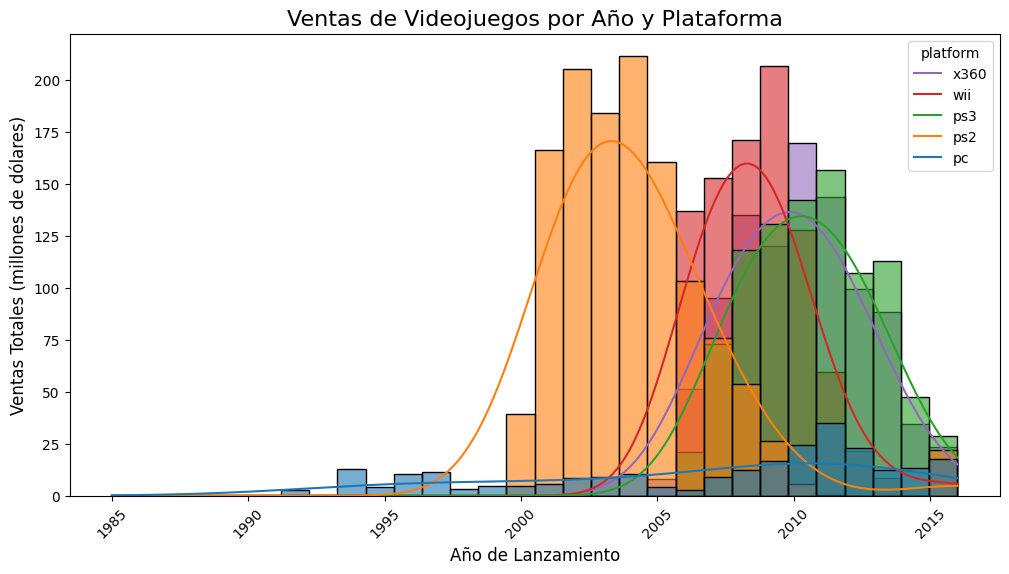

In [96]:

plt.figure(figsize=(12,6))

sns.histplot(data=games_platform_year, x='year_of_release', weights= 'total_sales', hue= 'platform', bins= 30, kde=True,palette='tab10',alpha=0.6)

plt.title('Ventas de Videojuegos por Año y Plataforma', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='platform', labels=['x360','wii','ps3','ps2','pc'])

plt.show()

In [97]:

games_platform_sale = games.groupby('platform')['total_sales'].sum()

top_platforms = games_platform_sale.sort_values(ascending=False).head(20).index.tolist()


#  Identificar plataformas populares que ya no tienen ventas

ultimo_anio = 2016  # Último año con datos
ventas_recientes = games[games['year_of_release'] == ultimo_anio]['platform'].unique()

plataformas_extintas = [p for p in top_platforms if p not in ventas_recientes]
print("Plataformas que solían ser populares pero ya no tienen ventas:", plataformas_extintas)



games_filtered=games[games['platform'].isin(platform_filter)]
# Análisis del tiempo de vida de las plataformas
vida_util = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
vida_util['duracion'] = vida_util['max'] - vida_util['min']

print("\nTiempo de vida de cada plataforma:")
print(vida_util.sort_values(by='duracion',ascending=False))

mean_vida_util= vida_util['duracion'].median() 
print()
print( f"Duracion promedio vida util {mean_vida_util} años")


Plataformas que solían ser populares pero ya no tienen ventas: ['nes', 'snes']

Tiempo de vida de cada plataforma:
           min   max  duracion
platform                      
2600      1980  2016        36
ds        1985  2016        31
pc        1985  2016        31
gb        1988  2016        28
ps        1994  2016        22
n64       1996  2016        20
gba       2000  2016        16
ps2       2000  2016        16
xb        2000  2016        16
gc        2001  2016        15
psp       2004  2016        12
nes       1983  1994        11
x360      2005  2016        11
wii       2006  2016        10
dc        1998  2008        10
ps3       2006  2016        10
snes      1990  1999         9
psv       2011  2016         5
sat       1994  1999         5
3ds       2011  2016         5
gen       1990  1994         4
wiiu      2012  2016         4
ng        1993  1996         3
xone      2013  2016         3
ps4       2013  2016         3
ws        1999  2001         2
3do       1994  1

### <a id='toc6_3_1_'></a>[Conclusiones](#toc0_)
De esta primera estapa de analisis explotario de datos se pueden deducir que tenemos tendencias y patrones relevantes a su vez el promedio de vida util de una plataforma y tambien la evidencia de que aproximadamente cada 6 años o menos se lanza una nueva plataforma teniendo en cuenta los datos de la plataforma. Es importante aclarar que se considera como una matriz de datos lo suficientemente importante apartir del 2010 en adelante, donde se pueden observar tendencian en cada plataforma y a su vez en cada generacion de las mismas que surge con el tiempo. 

# <a id='toc7_'></a>[¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?](#toc0_)

Centraremos nuestro analisis a partir del 2010 con el fin de identificar las tendencias relevantes que nos permitan responder las diferentes incognitas de este estudio de caso

In [98]:
# Nuevo dataframe con los datos de interes

games=games[games['year_of_release']>= 2010]

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5546 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5546 non-null   object 
 1   platform         5546 non-null   object 
 2   year_of_release  5546 non-null   Int64  
 3   genre            5546 non-null   object 
 4   na_sales         5546 non-null   float64
 5   eu_sales         5546 non-null   float64
 6   jp_sales         5546 non-null   float64
 7   other_sales      5546 non-null   float64
 8   critic_score     5546 non-null   object 
 9   user_score       5546 non-null   object 
 10  rating           5546 non-null   object 
 11  total_sales      5546 non-null   float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 568.7+ KB


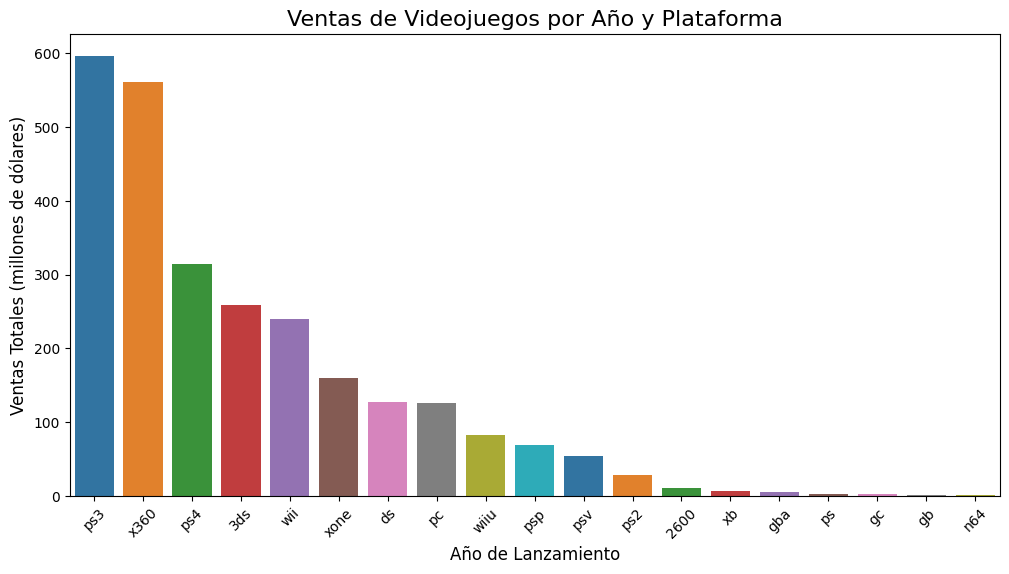

In [99]:
# Plataformas lideres


games_leader=games.groupby('platform')['total_sales'].sum().reset_index()
games_leader_platform = games_leader.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(data=games_leader_platform, x='platform',y= 'total_sales', hue= 'platform',palette='tab10')

plt.title('Ventas de Videojuegos por Año y Plataforma', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

### <a id='toc7_1_1_'></a>[Lideres en ventas :](#toc0_)

Tras analizar la clasificación de las plataformas líderes en el mercado, se identifica a Sony como la empresa dominante, destacando especialmente la PS3 como la consola con mayor participación. Además, su consola de nueva generación también se posiciona entre las más vendidas.

En segundo lugar, Microsoft mantiene una fuerte presencia con la Xbox 360, que representa una parte significativa del mercado, seguida por la Xbox One, su consola de nueva generación.

Por su parte, Nintendo también se encuentra entre los líderes con sus plataformas 3DS, Wii y Wii U, consolidando su posición en la industria.
En conjunto, estas tres empresas dominan el sector con seis plataformas, reflejando su influencia en el mercado de los videojuegos.

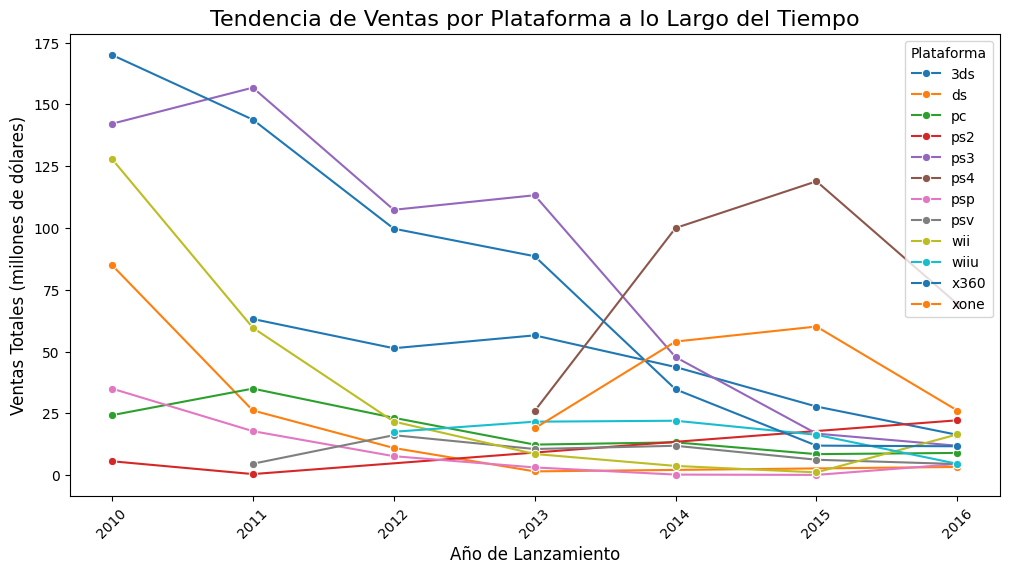

In [100]:



# 3. Calcular ventas por plataforma y año (TENDENCIA DE CRECIMIENTO / DECLIVE)
games_platform_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#  4. Filtrar las plataformas más vendidas (TOP 5 para mejor visualización)
top_platforms = games_leader_platform['platform'].head(12).tolist()
games_top_platforms = games_platform_year[games_platform_year['platform'].isin(top_platforms)]

#  5. Graficar tendencia de ventas por plataforma a lo largo del tiempo
plt.figure(figsize=(12,6))
sns.lineplot(data=games_top_platforms, x='year_of_release', y='total_sales', hue='platform', palette='tab10', marker="o")

plt.title('Tendencia de Ventas por Plataforma a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title="Plataforma")
plt.show()

El análisis del comportamiento de las ventas totales revela que varias plataformas presentan una tendencia decreciente. Sin embargo, este patrón es esperado al considerar su año de lanzamiento y la vida útil promedio de cada consola. Paralelamente, se observa el surgimiento de nuevas generaciones de consolas que impulsan repuntes en las ventas, siguiendo un ciclo de adopción tecnológica.

En particular, Sony y Microsoft han mantenido este patrón con el lanzamiento de sus nuevas consolas. No obstante, el crecimiento en estas generaciones recientes es más moderado en comparación con el impacto de sus predecesoras.

Por otro lado, la PC ha demostrado ser una plataforma que trasciende generaciones, manteniendo un patrón de ventas estable a lo largo del tiempo. Esta característica la convierte en una opción de inversión más segura, ya que su comportamiento es más predecible en comparación con las consolas.

Nintendo, aunque sigue un patrón similar con sus plataformas, presenta una evolución más conservadora en términos de crecimiento, lo que sugiere que su impacto en el mercado es más reservado en comparación con otras marcas.

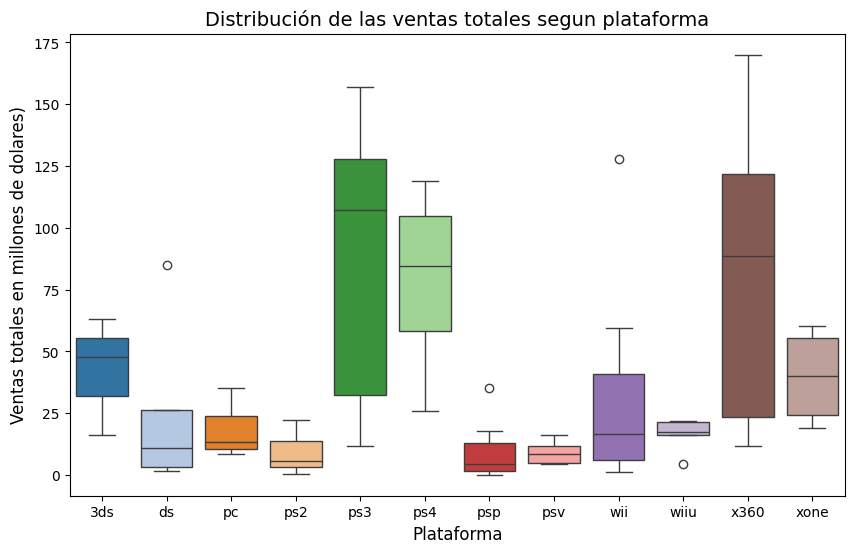

In [101]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=games_top_platforms, x='platform', y='total_sales',hue='platform', palette='tab20')
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("Ventas totales en millones de dolares)", fontsize=12)
plt.title("Distribución de las ventas totales segun plataforma", fontsize=14)

plt.show()


En los anteriores diagramas de caja muestra de las plataformas top,se expuso la distribución de las ventas totales por plataforma en millones de dólares. A partir del gráfico, se pueden destacar las siguientes observaciones:

Plataformas con mayores ventas y dispersión:
PS3, X360 y PS4 tienen las mayores ventas totales y una amplia dispersión en los datos, lo cual era un comportamiento esperado por la canntiad de titulos y ventas asociadas a los mismos.
La PS3 y la X360 muestran medianas altas, indicando que la mayoría de sus ventas se encuentran en niveles elevados.
La PS4 también muestra un rendimiento sólido, aunque con una menor dispersión en comparación con PS3 y X360.

Plataformas con ventas más estables y bajas:
PC, PSP y PSV presentan distribuciones más compactas con ventas totales más bajas y menos variabilidad, reiterando asi el comportanmiento descrito en anteriores citaciones, evidenciando refenta a la PC con dispercion menor pero estable en el tiempo.
Wii U tiene un rango de ventas reducido en comparación con su predecesora Wii, lo que sugiere un menor impacto en el mercado.

Outliers (valores atípicos):
Se observan valores atípicos en plataformas como DS, PSP, Wii y X360, lo que indica que algunos juegos tuvieron ventas excepcionalmente altas en comparación con el resto de los títulos en la misma plataforma, cabe anotar que para PS3 se puede apreciar un comportamiento similar, donde hubo algunos titulos con ventas considerablemente pero sin sen tar excesivamente alta.

Diferencias en la dispersión:
La PS2, a pesar de ser una de las plataformas más emblemáticas, muestra una menor dispersión en ventas en comparación con PS3 y X360.
Wii tiene una distribución amplia, lo que sugiere que algunos títulos tuvieron mucho éxito, mientras que otros vendieron significativamente menos.

Tendencias generales:
Las consolas de generaciones más recientes (PS4, XOne) tienen una mediana alta, lo que indica un desempeño consistente en ventas, centrando asi el foco de atencion como prometedoras plafatormas con crecimiento en sus ventas para lo largo del 2017.
Las plataformas más antiguas (PS2, DS, PSP) muestran menor dispersión y ventas más bajas, indicando su declive en el mercado, asociado a el lanzamiento de su nueva generacion.
La PC mantiene ventas relativamente bajas pero estables, lo que confirma su patrón predecible en el tiempo.
### <a id='toc7_1_2_'></a>[Conclusión:](#toc0_)
Este diagrama sugiere que Sony y Microsoft lideraron en ventas con PS3, X360 y PS4, mientras que Nintendo tuvo un desempeño más variable con Wii y 3DS. Además, se observa que las consolas más recientes tienen un crecimiento más controlado, mientras que las más antiguas han entrado en declive, esto resalta la teoria anteriormente citada en referencia a los años utiles presentes en las plataformas modernas, pero asi mismo se puede emepezar a observar como esto influye para los cambios venideros .

# <a id='toc8_'></a>[Reseñas De Usuarios Vs Profesionales](#toc0_)

## <a id='toc8_1_'></a>[¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?](#toc0_)

In [102]:
# Filtrar solo los datos de la plataforma PS3

games_ps3 = games[games['platform'] == 'ps3']

games_ps3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             914 non-null    object 
 1   platform         914 non-null    object 
 2   year_of_release  914 non-null    Int64  
 3   genre            914 non-null    object 
 4   na_sales         914 non-null    float64
 5   eu_sales         914 non-null    float64
 6   jp_sales         914 non-null    float64
 7   other_sales      914 non-null    float64
 8   critic_score     914 non-null    object 
 9   user_score       914 non-null    object 
 10  rating           914 non-null    object 
 11  total_sales      914 non-null    float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 93.7+ KB


In [103]:
# Seleccion de datos al azar teniendo encuenta el top de ventas 


games_ps3_top_list = games_ps3.sort_values(by='total_sales', ascending=False).head(8)

print(games_ps3_top_list)

                               name platform  year_of_release    genre  \
16               grand theft auto v      ps3             2013   action   
34       call of duty: black ops ii      ps3             2012  shooter   
37   call of duty: modern warfare 3      ps3             2011  shooter   
41          call of duty: black ops      ps3             2010  shooter   
54                   gran turismo 5      ps3             2010   racing   
69             call of duty: ghosts      ps3             2013  shooter   
81                   fifa soccer 13      ps3             2012   action   
104                   battlefield 3      ps3             2011  shooter   

     na_sales  eu_sales  jp_sales  other_sales critic_score user_score rating  \
16       7.02      9.09      0.98         3.96         97.0        8.2      m   
34       4.99      5.73      0.65         2.42         83.0        5.3      m   
37       5.54      5.73      0.49         1.57         88.0        3.2      m   
41       

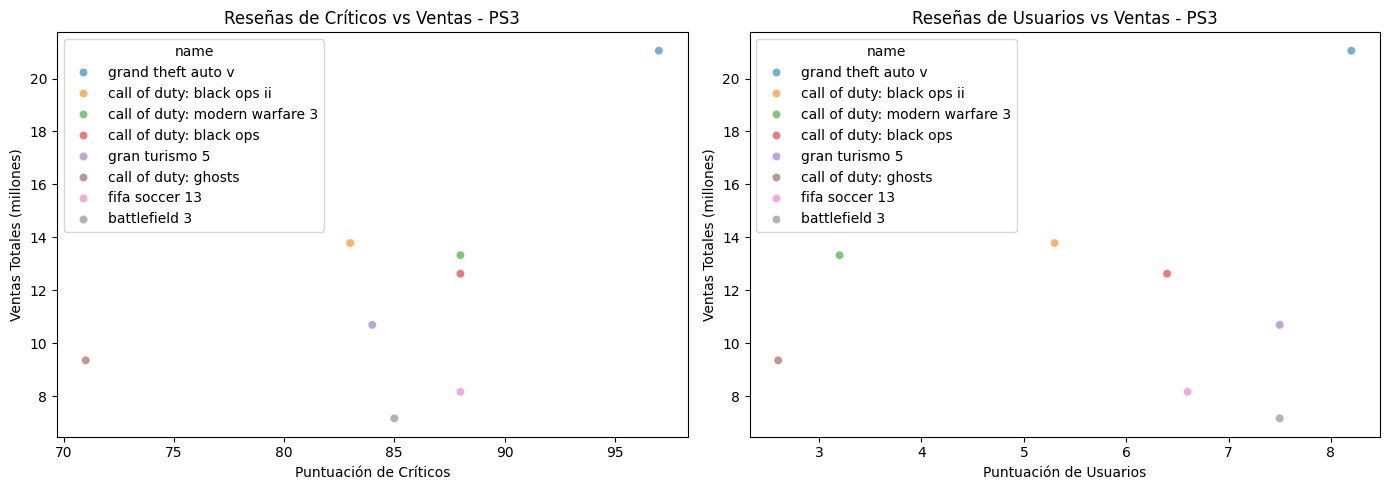

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión para reseñas de críticos
sns.scatterplot(data=games_ps3_top_list, x='critic_score', y='total_sales',hue='name', alpha=0.6, ax=axes[0])
axes[0].set_title('Reseñas de Críticos vs Ventas - PS3')
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')

# Gráfico de dispersión para reseñas de usuarios
sns.scatterplot(data=games_ps3_top_list, x='user_score', y='total_sales',hue='name', alpha=0.6, ax=axes[1])
axes[1].set_title('Reseñas de Usuarios vs Ventas - PS3')
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

In [105]:


correlacion_criticos = games_ps3_top_list['critic_score'].corr(games_ps3_top_list['total_sales'])
correlacion_usuarios = games_ps3_top_list['user_score'].corr(games_ps3_top_list['total_sales'])

print(f"Correlación entre puntuaciones de críticos y ventas: {correlacion_criticos:.2f}")
print(f"Correlación entre puntuaciones de usuarios y ventas: {correlacion_usuarios:.2f}")


Correlación entre puntuaciones de críticos y ventas: 0.62
Correlación entre puntuaciones de usuarios y ventas: 0.20



Relación entre Reseñas de Críticos y Ventas (Gráfico Izquierdo)
Parece haber una ligera tendencia positiva: los juegos con mayores puntuaciones de críticos tienden a tener más ventas, a su vez esto se asocia a la popularidad de cada juego. Sin embargo, hay juegos con puntuaciones relativamente altas (alrededor de 88-97) que no necesariamente lideran en ventas. Grand Theft Auto V (GTA V) destaca como el juego más vendido con una alta puntuación de críticos.

Relación entre Reseñas de Usuarios y Ventas (Gráfico Derecho)
La distribución es más dispersa y no se observa una clara tendencia consecuencia que las opinones se encuentran mas divididas que en otros casos.
Algunas puntuaciones de usuarios son sorprendentemente bajas (entre 3 y 8), pero los juegos aún tienen ventas significativas.
Esto sugiere que las reseñas de usuarios pueden no ser tan influyentes como las de críticos en las ventas.

El análisis de dispersión, junto con el cálculo del coeficiente de correlación de Pearson, revela que las reseñas de críticos tienen una mayor influencia en las ventas de videojuegos en comparación con las reseñas de usuarios.

Los valores obtenidos, 0.62 para la correlación entre puntuaciones de críticos y ventas, y 0.20 para la correlación entre puntuaciones de usuarios y ventas, indican una relación moderada entre las evaluaciones de expertos y el éxito comercial de un título, mientras que la relación con las reseñas de usuarios es significativamente más débil.

Esto sugiere que los juegos con mejores calificaciones de críticos tienden a vender más, aunque no es el único factor determinante. La opinión de expertos en la industria parece ser una referencia clave para los consumidores y puede desempeñar un papel fundamental en la rentabilidad de un videojuego.

In [106]:
# Filtrar solo los datos de la plataforma X360
games_x360 = games[games['platform'] == 'x360']

games_x360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 14 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             710 non-null    object 
 1   platform         710 non-null    object 
 2   year_of_release  710 non-null    Int64  
 3   genre            710 non-null    object 
 4   na_sales         710 non-null    float64
 5   eu_sales         710 non-null    float64
 6   jp_sales         710 non-null    float64
 7   other_sales      710 non-null    float64
 8   critic_score     710 non-null    object 
 9   user_score       710 non-null    object 
 10  rating           710 non-null    object 
 11  total_sales      710 non-null    float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 72.8+ KB


In [107]:
games_filter=["grand theft auto v",'call of duty: black ops ii',"call of duty: modern warfare 3",'call of duty: black ops','gran turismo 5','call of duty: ghosts','fifa soccer 13','battlefield 3'] 
games_x360_top_list =games_x360[games_x360['name'].isin(games_filter)]

print(games_x360_top_list)

                               name platform  year_of_release    genre  \
23               grand theft auto v     x360             2013   action   
29   call of duty: modern warfare 3     x360             2011  shooter   
32          call of duty: black ops     x360             2010  shooter   
35       call of duty: black ops ii     x360             2012  shooter   
60             call of duty: ghosts     x360             2013  shooter   
101                   battlefield 3     x360             2011  shooter   
190                  fifa soccer 13     x360             2012   action   

     na_sales  eu_sales  jp_sales  other_sales critic_score user_score rating  \
23       9.66      5.14      0.06         1.41         97.0        8.1      m   
29       9.04      4.24      0.13         1.32         88.0        3.4      m   
32       9.70      3.68      0.11         1.13         87.0        6.3      m   
35       8.25      4.24      0.07         1.12         83.0        4.8      m   
60

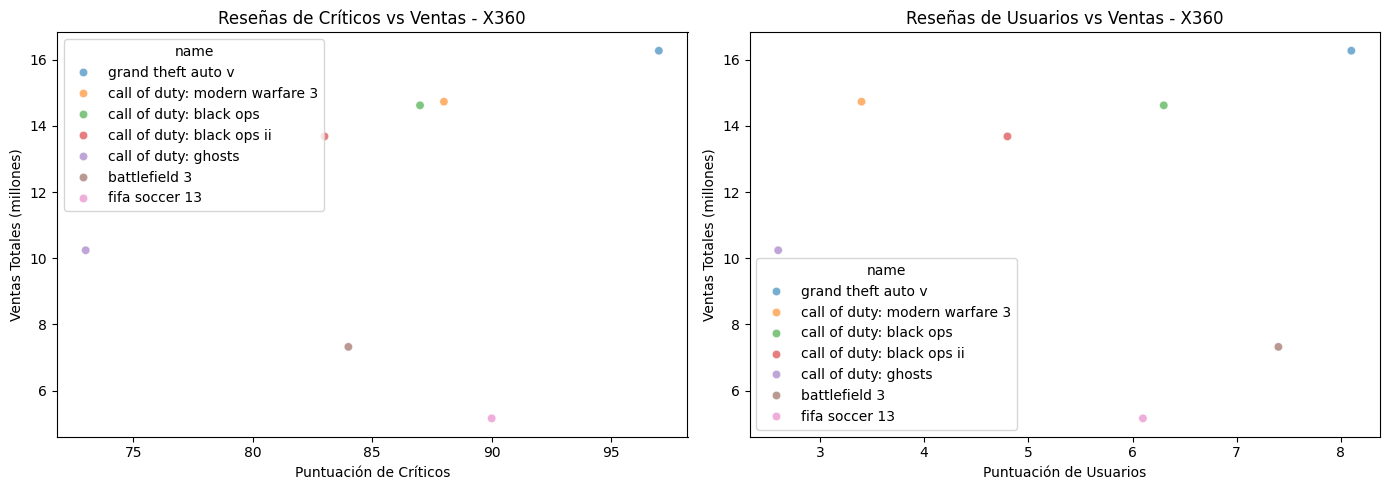

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión para reseñas de críticos
sns.scatterplot(data=games_x360_top_list, x='critic_score', y='total_sales',hue='name', alpha=0.6, ax=axes[0])
axes[0].set_title('Reseñas de Críticos vs Ventas - X360')
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')

# Gráfico de dispersión para reseñas de usuarios
sns.scatterplot(data=games_x360_top_list, x='user_score', y='total_sales',hue='name', alpha=0.6, ax=axes[1])
axes[1].set_title('Reseñas de Usuarios vs Ventas - X360')
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

In [109]:
correlacion_criticos = games_x360_top_list['critic_score'].corr(games_x360_top_list['total_sales'])
correlacion_usuarios = games_x360_top_list['user_score'].corr(games_x360_top_list['total_sales'])

print(f"Correlación entre puntuaciones de críticos y ventas: {correlacion_criticos:.2f}")
print(f"Correlación entre puntuaciones de usuarios y ventas: {correlacion_usuarios:.2f}")

Correlación entre puntuaciones de críticos y ventas: 0.30
Correlación entre puntuaciones de usuarios y ventas: -0.03



Reseñas de críticos vs. Ventas (gráfico de la izquierda):

Se observa una correlación positiva: los juegos con mayores puntuaciones de críticos tienden a vender más.
Juegos como Grand Theft Auto V y Call of Duty: Modern Warfare 3 tienen altas calificaciones y elevadas ventas.
Sin embargo, algunos juegos con buenas críticas no alcanzan el mismo nivel de ventas, lo que indica que las reseñas de expertos no son el único factor que influye en el éxito comercial.

Reseñas de usuarios vs. Ventas (gráfico de la derecha):

La dispersión de los datos es mayor, lo que sugiere que la relación entre las reseñas de usuarios y las ventas es más débil en comparación con la de los críticos.Existen juegos con bajas puntuaciones de usuarios que han vendido bien, lo que indica que la opinión del público no siempre es determinante para el éxito de un videojuego.GTA V mantiene una alta calificación de usuarios y elevadas ventas, lo que demuestra una aceptación positiva tanto de los críticos como de los jugadores.

Correlación entre puntuaciones de críticos y ventas: 0.30

Este valor indica una correlación positiva débil entre las calificaciones de críticos y las ventas.Si bien existe una tendencia a que los juegos con mejores reseñas de críticos vendan más, el impacto no es muy fuerte. Esto sugiere que otros factores, como la marca del juego, la campaña de marketing y la popularidad de la franquicia, pueden influir más en las ventas que la calificación de los expertos.

Correlación entre puntuaciones de usuarios y ventas: -0.03

Este valor indica que prácticamente no hay relación entre la calificación de los usuarios y las ventas. En algunos casos, los juegos pueden vender bien incluso con puntuaciones bajas de los jugadores, lo que sugiere que la percepción de los consumidores no es un factor determinante en la decisión de compra. Esto podría explicarse porque los jugadores compran juegos basándose en otros factores (por ejemplo, el marketing, la franquicia, la jugabilidad), en lugar de guiarse por las opiniones de otros usuarios.


## <a id='toc8_2_'></a>[Conclusión general:](#toc0_)
Las reseñas de críticos tienen una ligera influencia en las ventas, pero no son el único factor determinante.
Las opiniones de los usuarios no parecen afectar significativamente las ventas.
Otros factores como la reputación del juego, la publicidad y el reconocimiento de la franquicia juegan un papel más importante en el éxito comercial.
Las empresas deberían priorizar estrategias de marketing y branding en lugar de depender únicamente de las reseñas para impulsar las ventas.

El análisis de dispersión, junto con el cálculo del coeficiente de correlación de Pearson, revela que las reseñas de críticos tienen una mayor influencia en las ventas de videojuegos en comparación con las reseñas de usuarios.

Los valores obtenidos, 0.62 para la correlación entre puntuaciones de críticos y ventas, y 0.20 para la correlación entre puntuaciones de usuarios y ventas, indican una relación moderada entre las evaluaciones de expertos y el éxito comercial de un título, mientras que la relación con las reseñas de usuarios es significativamente más débil.

Esto sugiere que los juegos con mejores calificaciones de críticos tienden a vender más, aunque no es el único factor determinante. La opinión de expertos en la industria parece ser una referencia clave para los consumidores y puede desempeñar un papel fundamental en la rentabilidad de un videojuego.

# <a id='toc9_'></a>[Distribución General De Los Juegos Por Género](#toc0_)

Consecuente a nuestro estudio se procedera a analizar la distribucion de los generos en cuanto ventas y el exito dependiente de cada genero 

In [110]:
games_genre=games['genre'].unique()

print(games_genre)

['misc' 'action' 'role-playing' 'shooter' 'racing' 'platform' 'simulation'
 'sports' 'fighting' 'strategy' 'adventure' 'puzzle']


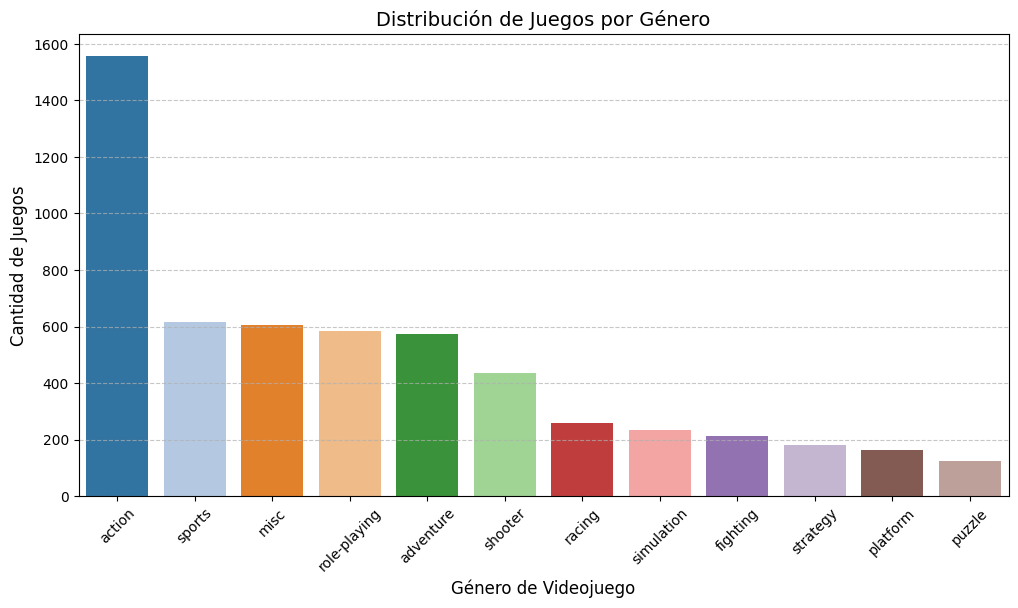

In [111]:
plt.figure(figsize=(12, 6))


genre_counts = games['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count'] 


sns.barplot(x='genre', y='count', data=genre_counts,hue="genre",palette="tab20")

plt.xlabel('Género de Videojuego', fontsize=12)
plt.ylabel('Cantidad de Juegos', fontsize=12)
plt.title('Distribución de Juegos por Género', fontsize=14)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

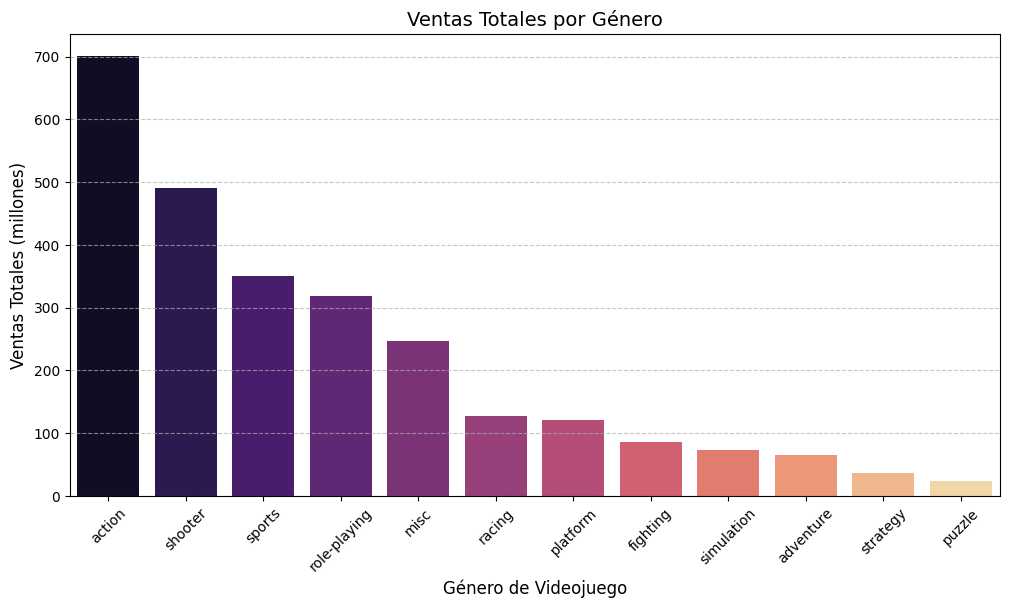

In [112]:
plt.figure(figsize=(12, 6))

# Calcular las ventas totales por género
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='genre', y='total_sales', data=genre_sales,hue="genre",palette="magma")

# Etiquetas y título
plt.xlabel('Género de Videojuego', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.title('Ventas Totales por Género', fontsize=14)

plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

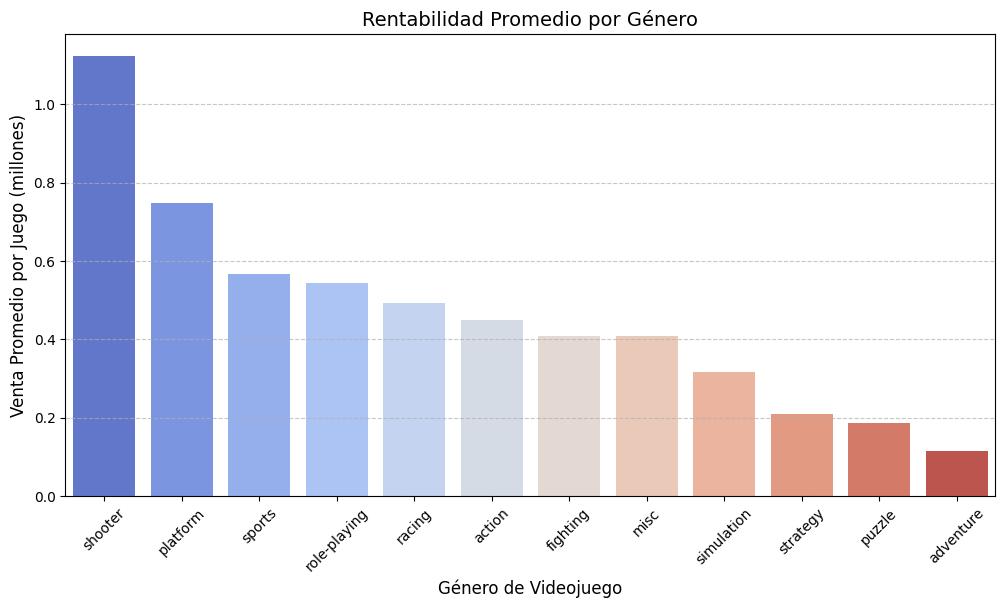

In [113]:
plt.figure(figsize=(12, 6))

genre_avg_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()

sns.barplot(x='genre', y='total_sales', data=genre_avg_sales,hue="genre",palette="coolwarm")


plt.xlabel('Género de Videojuego', fontsize=12)
plt.ylabel('Venta Promedio por Juego (millones)', fontsize=12)
plt.title('Rentabilidad Promedio por Género', fontsize=14)


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## <a id='toc9_1_'></a>[Conclusiones](#toc0_)
Cantidad vs. Rentabilidad
Los datos muestran que un género puede liderar en número de juegos o en ventas totales —como es el caso de Action, que cuenta con un volumen de títulos significativamente mayor— sin ser necesariamente el más rentable por unidad. En contraste, el género Shooter presenta un menor número de lanzamientos, pero con ventas promedio por juego más altas.

Géneros con Ventas Totales Elevadas
Action, Shooter, Sports y Role-Playing destacan por su volumen total de ventas, impulsadas en gran medida por franquicias consolidadas y audiencias amplias. Este comportamiento refleja la popularidad masiva que suelen alcanzar estos géneros, atrayendo a un público diverso.

Géneros con Alta Venta Promedio
A pesar de no liderar en cantidad de títulos, Shooter y Platform muestran un promedio de ventas por juego notablemente elevado. Este resultado sugiere que cada lanzamiento en estos géneros consigue una demanda sólida, en parte debido a la reputación de las franquicias y a la capacidad de llegar a un público objetivo más amplio.

Géneros más Modestos
Adventure y Puzzle registran un menor número de lanzamientos y ventas promedio bajas, lo que indica un mercado más especializado. Estos géneros suelen atraer a jugadores con gustos particulares y, por lo general, están respaldados por comunidades más pequeñas pero fieles.

Conclusión
En términos generales, existe una clara segmentación entre géneros de alta popularidad y géneros más de nicho. Mientras que algunos presentan una alta probabilidad de éxito por la naturaleza de sus mecánicas y público objetivo, otros muestran un comportamiento más estable, lo que puede traducirse en una inversión segura dentro de un nicho de mercado.


# <a id='toc10_'></a>[Perfil De Usuario Segun Cada Región (NA, UE, JP)](#toc0_)

Para cada región (NA, UE, JP) se tendra en cuenta

Las cinco plataformas principales y las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

## <a id='toc10_1_'></a>[Perfil para ventas en Norteamérica](#toc0_)

   index platform  na_sales
0     16     x360    340.91
1     10      ps3    232.61
2     14      wii    131.23
3     11      ps4    108.74
4     18     xone     93.12


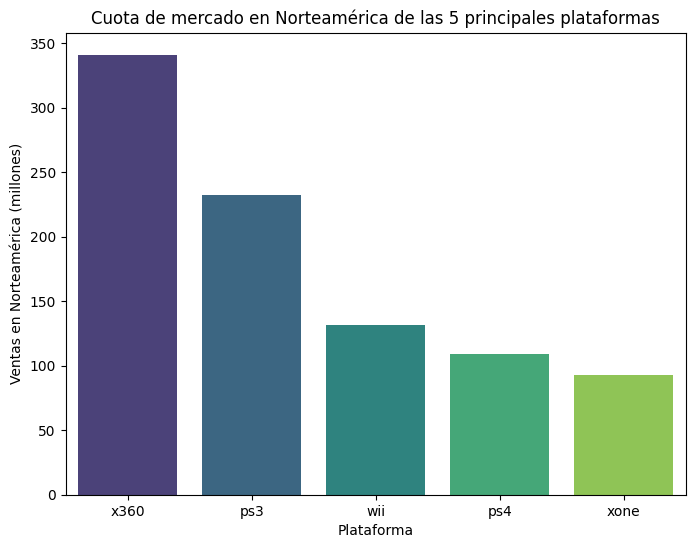

La cuota de mercado que representa para la región el top 5 es de 76.21%


In [114]:
# Perfil para NA_sales:

platform_sales_na = games.groupby('platform')['na_sales'].sum().reset_index()
top_platforms_na = platform_sales_na.sort_values(by='na_sales', ascending=False).head(5).reset_index()
print(top_platforms_na)


na_sales= platform_sales_na['na_sales'].sum()
na_sales_top= top_platforms_na['na_sales'].sum()

def percent_market (total_percent,sub_percent):
    percent = (sub_percent / total_percent) * 100
    print(f"La cuota de mercado que representa para la región el top 5 es de {percent:.2f}%")


plt.figure(figsize=(8,6))

sns.barplot(x='platform',y='na_sales', data=top_platforms_na,hue="platform", palette='viridis')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Norteamérica (millones)')
plt.title('Cuota de mercado en Norteamérica de las 5 principales plataformas')
plt.show()



percent_market=percent_market(na_sales,na_sales_top)

#### <a id='toc10_1_1_1_'></a>[Analisis:](#toc0_)
Xbox 360 lidera en ventas dentro de las cinco plataformas más populares, seguida de PS3 y Wii.
PS4 y Xbox One cierran el grupo, lo que confirma que las consolas de generaciones anteriores (360 y PS3) aún conservan una base instalada y ventas históricas muy fuertes.
El hecho de que estas cinco plataformas sumen más de las tres cuartas partes del mercado norteamericano muestra la concentración de ventas en pocas plataformas a su vez de la popularidad de las mismas.

El mercado de Norteamérica ha estado dominado, principalmente,por tres empresas, Liderado por Microsoft de fabricacion nacional (Xbox 360, Xbox One), Sony (PS3, PS4) y Nintendo (Wii).
A pesar del paso del tiempo, las consolas más antiguas (360, PS3, Wii) todavía representan una parte sustancial de las ventas totales.


   index         genre  na_sales
0      0        action    306.48
1      8       shooter    244.88
2     10        sports    170.04
3      3          misc    131.50
4      7  role-playing    112.82


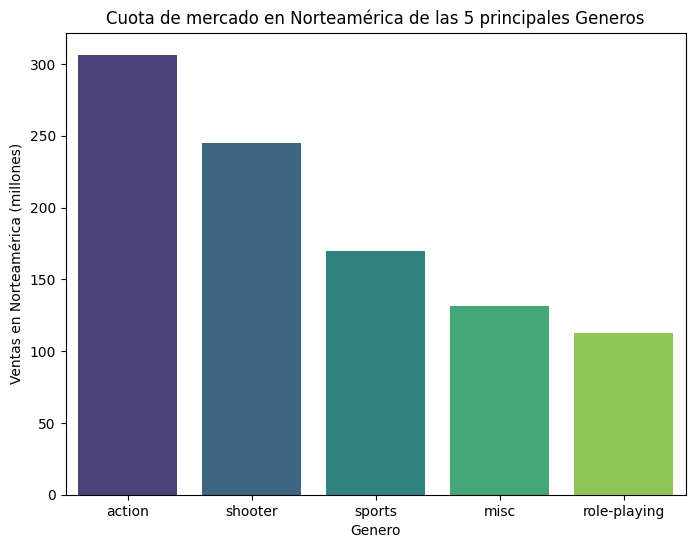

In [115]:


genre_sales_na = games.groupby('genre')['na_sales'].sum().reset_index()
top_genre_na = genre_sales_na.sort_values(by='na_sales', ascending=False).head(5).reset_index()
print(top_genre_na)




plt.figure(figsize=(8,6))

sns.barplot(x='genre',y='na_sales', data=top_genre_na,hue="genre", palette='viridis')
plt.xlabel('Genero')
plt.ylabel('Ventas en Norteamérica (millones)')
plt.title('Cuota de mercado en Norteamérica de las 5 principales Generos')
plt.show()



#### <a id='toc10_1_1_2_'></a>[Analisis](#toc0_)

Action y Shooter destacan con una clara ventaja, seguidos de Sports, Misc (juegos misceláneos) y Role-Playing.
La preferencia por títulos de acción y disparos es muy marcada, lo que sugiere una inclinación del público norteamericano hacia juegos de ritmo rápido o competitivos.

Las grandes franquicias de acción y disparos (por ejemplo, Call of Duty, Grand Theft Auto) impulsan este liderazgo.
El género Sports también conserva un público fiel, probablemente gracias a títulos anuales de franquicias deportivas populares.


  rating  na_sales
3      m    387.81
0      e    289.90
5      t    172.96
6    tbd    170.56
1   e10+    167.20
2     ec      1.13
4     rp      0.00


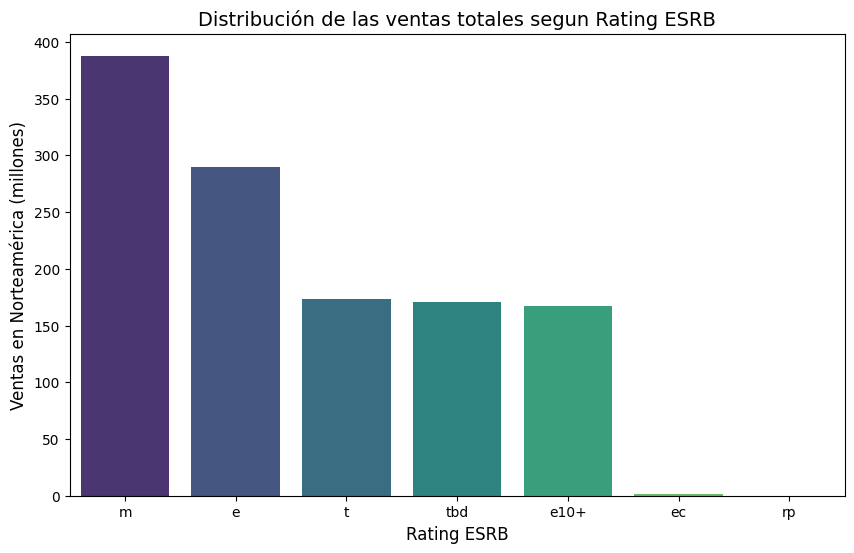

In [116]:

rating_sales_na = games.groupby('rating')['na_sales'].sum().reset_index()
rating_sales_na=rating_sales_na.sort_values(by='na_sales', ascending=False)
print(rating_sales_na)
plt.figure(figsize=(10, 6))

sns.barplot(data=rating_sales_na, x='rating', y='na_sales',hue='rating', palette='viridis')
plt.xlabel("Rating ESRB", fontsize=12)
plt.ylabel("Ventas en Norteamérica (millones)", fontsize=12)
plt.title("Distribución de las ventas totales segun Rating ESRB", fontsize=14)

plt.show()

#### <a id='toc10_1_1_3_'></a>[Analisis](#toc0_)
La clasificación M (Mature) lidera en ventas, seguida de E (Everyone).
T (Teen) se ubica en un nivel intermedio, y las clasificaciones E10+ y EC tienen volúmenes menores.
Existe un volumen no clasificado o pendiente (tbd) que también acumula ventas considerables.

El público adulto (M) es muy significativo en Norteamérica, lo que explica la fortaleza de géneros como Shooter y Action.
No obstante, la categoría E (apta para todos) también presenta una cuota importante, lo que indica que los juegos familiares e infantiles mantienen relevancia.


### <a id='toc10_1_2_'></a>[Estructura y Conclusiones de Perfil Americano](#toc0_)

Concentración en pocas plataformas: El 76.21% de la cuota de mercado se reparte entre cinco sistemas, confirmando que la industria se concentra en un número reducido de plataformas líderes.
Preferencia por géneros de acción y disparos: Action y Shooter se llevan la mayor parte de las ventas, lo que sugiere una audiencia inclinada a la adrenalina y la competencia.
Dominio de la clasificación M: Los juegos para público adulto son los más vendidos, aunque las categorías E y T también tienen una presencia relevante.
Estrategias de mercado: Para desarrolladores y editores que busquen maximizar sus ventas en Norteamérica, enfocarse en plataformas líderes y géneros de alta demanda (especialmente Shooter y Action) parece clave. Asimismo, los títulos con clasificación M tienen un amplio público, pero no se debe subestimar el segmento de juegos familiares (E).
En conjunto, estos hallazgos delinean un perfil de consumo en el que los usuarios de Norteamérica se inclinan hacia franquicias de acción y disparos en consolas principales de Microsoft, Sony y Nintendo, con un público adulto muy presente y un nicho familiar que también genera ventas significativas.

## <a id='toc10_2_'></a>[Perfil para ventas en la Union Europea](#toc0_)

   index platform  eu_sales
0     10      ps3    216.68
1     16     x360    165.85
2     11      ps4    141.09
3      7       pc     70.89
4     14      wii     69.80


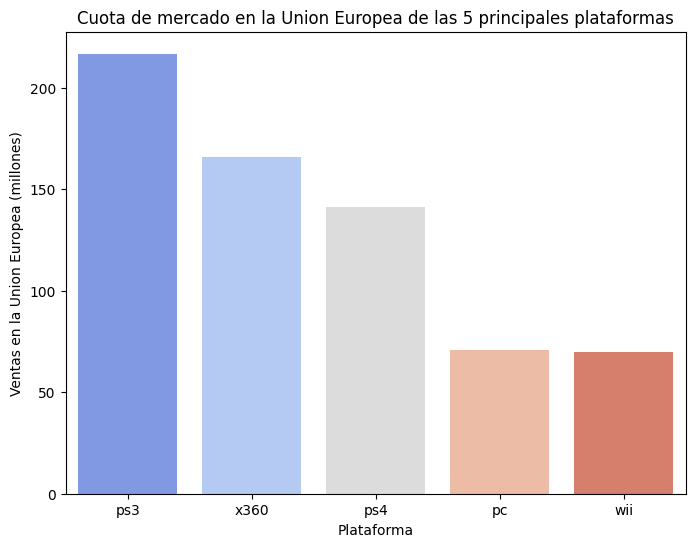

La cuota de mercado que representa para la región el top 5 es de 76.74%


In [117]:
# Perfil para EU_sales:

platform_sales_eu = games.groupby('platform')['eu_sales'].sum().reset_index()
top_platforms_eu = platform_sales_eu.sort_values(by='eu_sales', ascending=False).head(5).reset_index()
print(top_platforms_eu)

eu_sales= platform_sales_eu['eu_sales'].sum()
eu_sales_top= top_platforms_eu['eu_sales'].sum()

def percent_market (total_percent,sub_percent):
    percent = (sub_percent / total_percent) * 100
    print(f"La cuota de mercado que representa para la región el top 5 es de {percent:.2f}%")
    
plt.figure(figsize=(8,6))

sns.barplot(x='platform',y='eu_sales', data=top_platforms_eu,hue="platform", palette='coolwarm')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en la Union Europea (millones)')
plt.title('Cuota de mercado en la Union Europea de las 5 principales plataformas')
plt.show()



percent_market=percent_market(eu_sales,eu_sales_top)

#### <a id='toc10_2_1_1_'></a>[Analisis](#toc0_)

Las cinco plataformas más populares (p53, x360, p54, pc, wii) concentran un 76.73% de la cuota de mercado en la Unión Europea.

Este dominio indica que los consumidores en la UE se inclinan hacia marcas y tecnologías consolidadas, ya sea por la variedad de títulos exclusivos, el rendimiento de cada plataforma o la fidelidad a ciertas franquicias.

   index         genre  eu_sales
0      0        action    241.77
1      8       shooter    174.27
2     10        sports    122.30
3      7  role-playing     75.95
4      3          misc     68.23


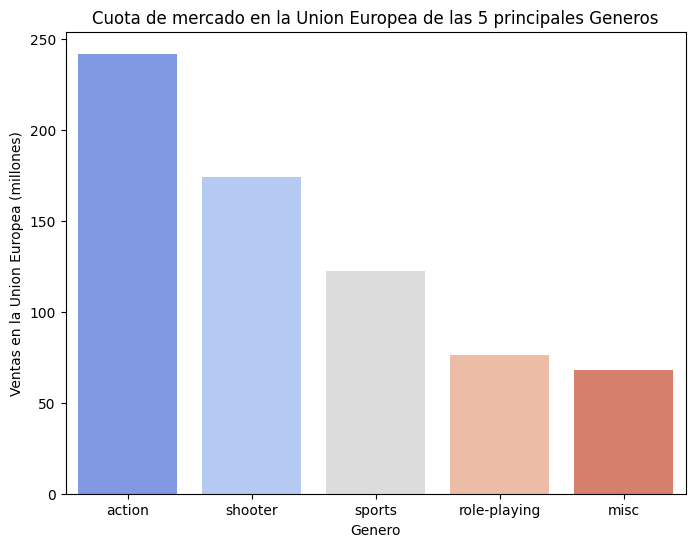

In [118]:
genre_sales_eu = games.groupby('genre')['eu_sales'].sum().reset_index()
top_genre_eu = genre_sales_eu.sort_values(by='eu_sales', ascending=False).head(5).reset_index()
print(top_genre_eu)




plt.figure(figsize=(8,6))

sns.barplot(x='genre',y='eu_sales', data=top_genre_eu,hue="genre", palette='coolwarm')
plt.xlabel('Genero')
plt.ylabel('Ventas en la Union Europea (millones)')
plt.title('Cuota de mercado en la Union Europea de las 5 principales Generos')
plt.show()


#### <a id='toc10_2_1_2_'></a>[Analisis](#toc0_)

Los géneros más vendidos son action, shooter, destanado por el comportamiento bastante claro

La preferencia por juegos de acción y disparos resalta el gusto por experiencias dinámicas y competitivas. El interés en sports y role-playing sugiere que los jugadores también buscan opciones que combinen competitividad con aspectos narrativos y de progreso de personaje.

  rating  eu_sales
3      m    296.01
0      e    203.72
6    tbd    143.09
5      t    118.32
1   e10+    104.45
4     rp      0.08
2     ec      0.00


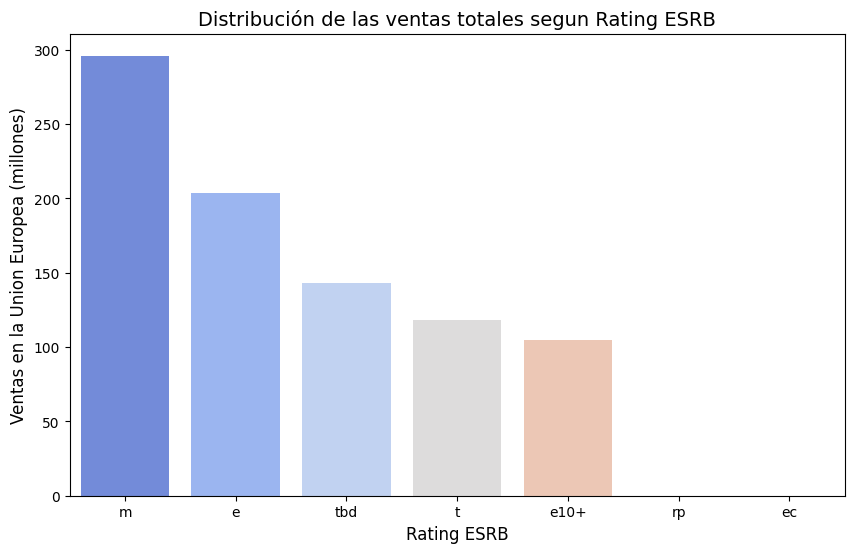

In [119]:
rating_sales_eu = games.groupby('rating')['eu_sales'].sum().reset_index()
rating_sales_eu=rating_sales_eu.sort_values(by='eu_sales', ascending=False)
print(rating_sales_eu)
plt.figure(figsize=(10, 6))

sns.barplot(data=rating_sales_eu, x='rating', y='eu_sales',hue='rating', palette='coolwarm')
plt.xlabel("Rating ESRB", fontsize=12)
plt.ylabel("Ventas en la Union Europea (millones)", fontsize=12)
plt.title("Distribución de las ventas totales segun Rating ESRB", fontsize=14)

plt.show()

#### <a id='toc10_2_1_3_'></a>[Analisis](#toc0_)

La clasificación M (Maduro) muestra el mayor volumen de ventas, superando a las demás categorías.

Los consumidores parecen inclinarse hacia contenido más adulto, con temas y mecánicas complejas o realistas. Aun así, otras clasificaciones (como E o T) mantienen una presencia relevante en el mercado.

### <a id='toc10_2_2_'></a>[Estructura y Conclusonas del perfil Europeo](#toc0_)

Preferencias de Plataforma:
Los jugadores eligen plataformas ampliamente establecidas, lo que sugiere lealtad a marcas y ecosistemas ya conocidos.

Preferencias de Género:
Existe una clara inclinación hacia géneros intensos y competitivos (action, shooter), pero otros géneros como sports y role-playing también conservan un público significativo.

Preferencias de Contenido:
El liderazgo de los títulos con clasificación M indica una audiencia que valora la profundidad narrativa y temáticas dirigidas a jugadores adultos.

En conjunto, el mercado de la UE se caracteriza por consolas populares, géneros de acción competitiva y un notable peso de los juegos dirigidos a un público maduro.

## <a id='toc10_3_'></a>[Perfil para ventas en Japon](#toc0_)

   index platform  jp_sales
0      1      3ds    100.67
1     10      ps3     60.04
2     12      psp     43.10
3      2       ds     28.45
4     13      psv     21.91


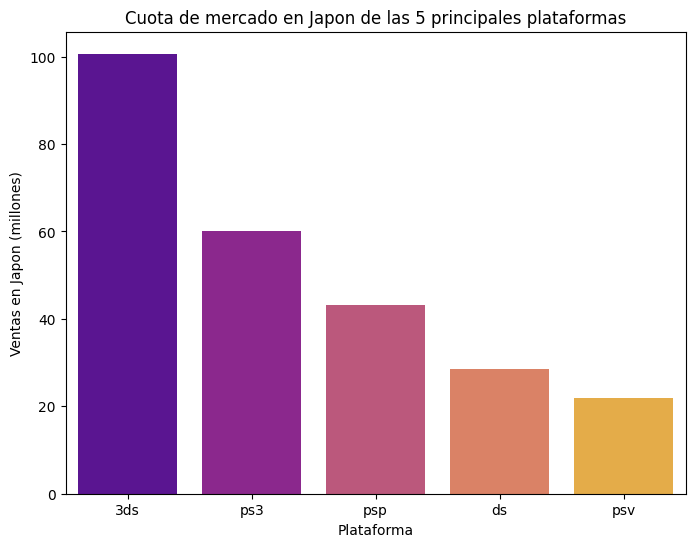

La cuota de mercado que representa para la región el top 5 es de 81.51%


In [120]:
# Perfil para JP_sales:

platform_sales_jp = games.groupby('platform')['jp_sales'].sum().reset_index()
top_platforms_jp = platform_sales_jp.sort_values(by='jp_sales', ascending=False).head(5).reset_index()
print(top_platforms_jp)

jp_sales= platform_sales_jp['jp_sales'].sum()
jp_sales_top= top_platforms_jp['jp_sales'].sum()

def percent_market (total_percent,sub_percent):
    percent = (sub_percent / total_percent) * 100
    print(f"La cuota de mercado que representa para la región el top 5 es de {percent:.2f}%")
    
plt.figure(figsize=(8,6))

sns.barplot(x='platform',y='jp_sales', data=top_platforms_jp,hue="platform", palette='plasma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Japon (millones)')
plt.title('Cuota de mercado en Japon de las 5 principales plataformas')
plt.show()



percent_market=percent_market(jp_sales,jp_sales_top)

#### <a id='toc10_3_1_1_'></a>[Analisis](#toc0_)

Las cinco plataformas líderes (3DS, PS3, PSP, DS y PSV) concentran el 81.51% del mercado japonés, evidenciando la fortaleza de los dispositivos portátiles y las consolas tradicionales. La presencia destacada de 3DS y PSP subraya el valor que otorgan los consumidores japoneses a la portabilidad y conveniencia. Se descata de manera significativa que todas las consolas son de produccion nacional resaltando el perfil de consumo local.

   index         genre  jp_sales
0      7  role-playing    105.56
1      0        action     73.49
2      3          misc     25.38
3     10        sports     16.12
4      4      platform     15.93


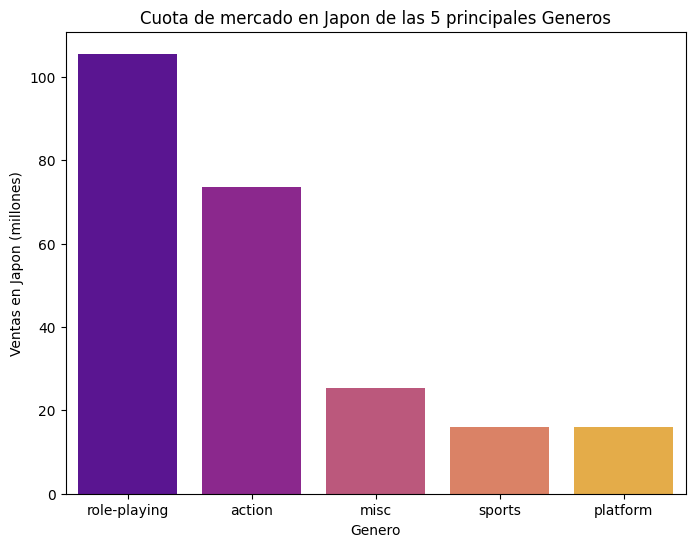

In [121]:
genre_sales_jp = games.groupby('genre')['jp_sales'].sum().reset_index()
top_genre_jp = genre_sales_jp.sort_values(by='jp_sales', ascending=False).head(5).reset_index()
print(top_genre_jp)




plt.figure(figsize=(8,6))

sns.barplot(x='genre',y='jp_sales', data=top_genre_jp,hue="genre", palette='plasma')
plt.xlabel('Genero')
plt.ylabel('Ventas en Japon (millones)')
plt.title('Cuota de mercado en Japon de las 5 principales Generos')
plt.show()


#### <a id='toc10_3_1_2_'></a>[Analisis](#toc0_)

Los géneros más vendidos en Japón son Role-Playing, Action, Misc, Sports y Platform. El dominio de los juegos de rol refleja la preferencia por narrativas profundas y sistemas de juego complejos. Al mismo tiempo, el interés por Action y Platform confirma la atracción hacia experiencias dinámicas y desafiantes.

  rating  jp_sales
6    tbd    176.68
0      e     48.02
5      t     42.81
3      m     31.11
1   e10+     13.22
2     ec      0.00
4     rp      0.00


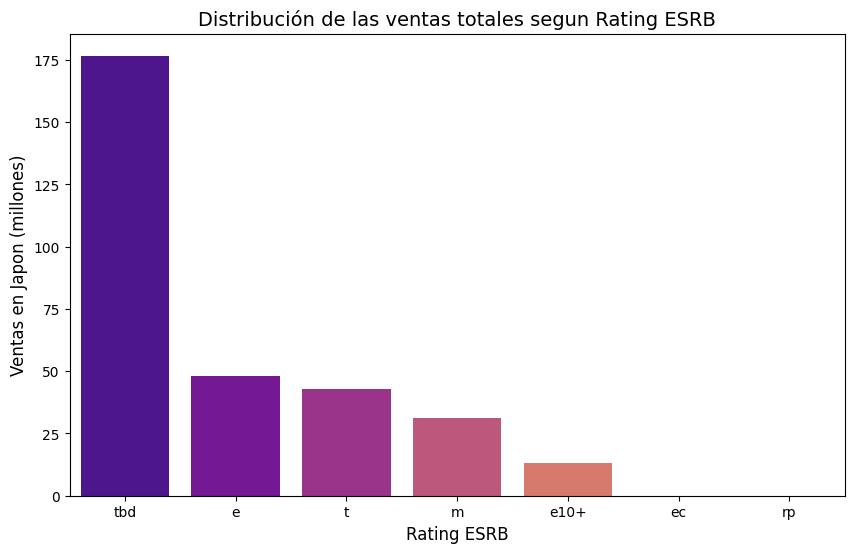

In [122]:
rating_sales_jp = games.groupby('rating')['jp_sales'].sum().reset_index()
rating_sales_jp=rating_sales_jp.sort_values(by='jp_sales', ascending=False)
print(rating_sales_jp)
plt.figure(figsize=(10, 6))

sns.barplot(data=rating_sales_jp, x='rating', y='jp_sales',hue='rating', palette='plasma')
plt.xlabel("Rating ESRB", fontsize=12)
plt.ylabel("Ventas en Japon (millones)", fontsize=12)
plt.title("Distribución de las ventas totales segun Rating ESRB", fontsize=14)

plt.show()

#### <a id='toc10_3_1_3_'></a>[Analisis](#toc0_)

Las ventas se reparten principalmente entre las categorías "tbd" (pendientes de clasificación) y "e" (Everyone). La fuerte presencia de títulos con calificación E indica que el público japonés valora los juegos familiares y accesibles. El volumen en "tbd" sugiere, por un lado, la existencia de títulos aún no clasificados, y por otro, la posibilidad de juegos con un enfoque más específico o de nicho.

### <a id='toc10_3_2_'></a>[Estructura y Conclusionas del perfil Japones](#toc0_)

Preferencias de Plataforma: El mercado japonés se inclina hacia consolas de produccion nacional portátiles y tradicionales, reflejando una cultura de juego móvil y doméstico.
Preferencias de Género: La marcada inclinación por Role-Playing evidencia el interés en historias elaboradas y mecánicas profundas, mientras que los géneros de Action y Platform mantienen popularidad gracias a su jugabilidad dinámica.
Preferencias de Contenido: La predominancia de clasificaciones E (Everyone) señala la importancia de juegos familiares, accesibles a un amplio rango de jugadores.

# <a id='toc11_'></a>[Prueba de Hipotesis](#toc0_)

En el trascurso del desarrollo del proyecto es de manera importante esclarecer unas condicioes referente a similitudes de ciertos datos o estadisticamente una igualdad significativa, por tal razon platenteamos pequeñas pruebas para este fin: 

-¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?.
-¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?.

In [123]:
#-¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas?.

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games = games.dropna(subset=['user_score'])
games['user_score'] = games['user_score'].astype(float)


xone_scores = games[games['platform'] == 'xone']['user_score']
pc_scores   = games[games['platform'] == 'pc']['user_score']


print("Hipótesis:")
print("H₀: La calificación promedio de los usuarios en Xbox One es igual a la de PC (μ₍xone₎ = μ₍pc₎)")
print("H₁: La calificación promedio de los usuarios en Xbox One es diferente a la de PC (μ₍xone₎ ≠ μ₍pc₎)")
print()

alpha = 0.05


results = st.ttest_ind(xone_scores, pc_scores)

print("Valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio de los usuarios.")
else:
    print("No podemos rechazar la hipótesis nula: no se observa una diferencia significativa en las calificaciones promedio de los usuarios.")



Hipótesis:
H₀: La calificación promedio de los usuarios en Xbox One es igual a la de PC (μ₍xone₎ = μ₍pc₎)
H₁: La calificación promedio de los usuarios en Xbox One es diferente a la de PC (μ₍xone₎ ≠ μ₍pc₎)

Valor p: 0.9354017046033494
No podemos rechazar la hipótesis nula: no se observa una diferencia significativa en las calificaciones promedio de los usuarios.


In [124]:
#-¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?.

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games = games.dropna(subset=['user_score'])
games['user_score'] = games['user_score'].astype(float)


action_scores = games[games['genre'] == 'action']['user_score']
sports_scores   = games[games['genre'] == 'sports']['user_score']


print("Hipótesis:")
print("H₀: La calificación promedio de los usuarios para el genero Accion es igual a la de Deportes (μ₍action₎ = μ₍sports₎)")
print("H₁: La calificación promedio de los usuarios para el genero Accion es diferente a la de Deportes (μ₍action₎ ≠ μ₍sports₎)")
print()

alpha = 0.05


results = st.ttest_ind(action_scores, sports_scores)

print("Valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio de los usuarios.")
else:
    print("No podemos rechazar la hipótesis nula: no se observa una diferencia significativa en las calificaciones promedio de los usuarios.")

Hipótesis:
H₀: La calificación promedio de los usuarios para el genero Accion es igual a la de Deportes (μ₍action₎ = μ₍sports₎)
H₁: La calificación promedio de los usuarios para el genero Accion es diferente a la de Deportes (μ₍action₎ ≠ μ₍sports₎)

Valor p: 5.490769655699835e-16
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio de los usuarios.



## <a id='toc11_1_'></a>[Conclusiones Generales](#toc0_)

A partir del gráfico y los datos disponibles, sí se aprecia una asociación entre la clasificación ESRB y las ventas: los juegos con calificación M (Mature) muestran las ventas más altas en Norteamérica, mientras que las clasificaciones E (Everyone) y T (Teen) se sitúan en un segundo plano.

No obstante, es importante tener en cuenta que esta relación no implica necesariamente una causalidad directa. Es decir, el hecho de que un juego sea calificado como M no es, por sí solo, la única razón de su éxito. Muchas franquicias populares (por ejemplo, en géneros de acción y disparos) reciben clasificación M y, a su vez, suelen contar con grandes presupuestos de marketing y reconocimiento de marca.

En conclusión, la clasificación ESRB parece influir en la distribución de ventas al coincidir con géneros muy populares, pero sería necesario un análisis más profundo (considerando factores como publicidad, franquicias establecidas, entre otros) para determinar en qué medida la calificación por edades impacta de forma directa en el comportamiento de los consumidores.

---